# Classification

This chapter shows

- binary classificaiton example for tabular data
- how to handle multi-class
- prob versus class

TODO: Copy from here: https://github.com/slundberg/shap/blob/master/notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.ipynb

In general, for binary classification we have two outputs. ONe probability output for the first class, and one for the second.
But since one of the class probabilities already defines what the probability of the other is, we can get away with just working with one of the probabilities.

From the angle of shap, that looks the same way as regression looks like.
Except that the scale is not regression but the score output.

In [240]:
import shap
X,y = shap.datasets.adult()

Next step we train the model:

In [241]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X, y)

KNeighborsClassifier()

In [242]:
ex = shap.Explainer(model.predict_proba, X.iloc[0:20,:])

In [243]:
shap_values = ex(X.iloc[0:10,:])

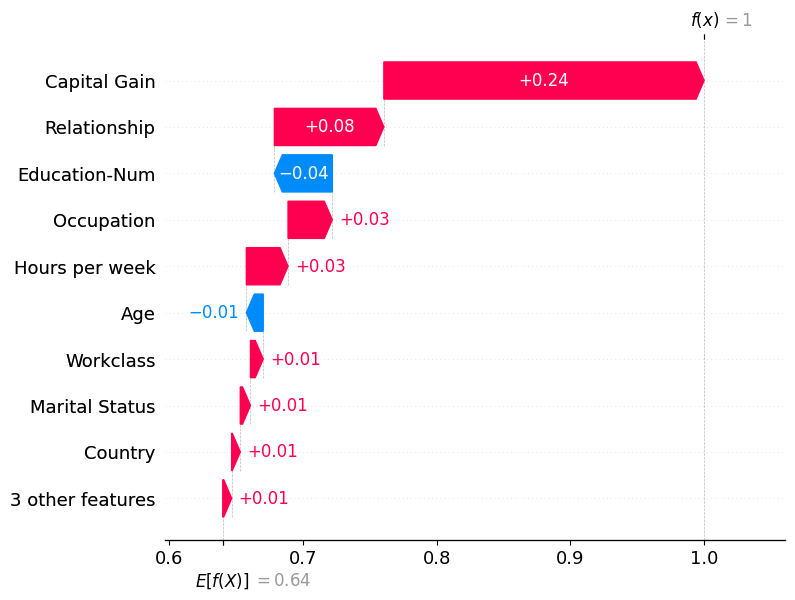

In [244]:
class_index= 0

sv = shap.Explanation(values = shap_values.values[0,:,class_index],
                      base_values = shap_values.base_values[0,class_index],
                      feature_names=X.columns)
shap.waterfall_plot(sv)

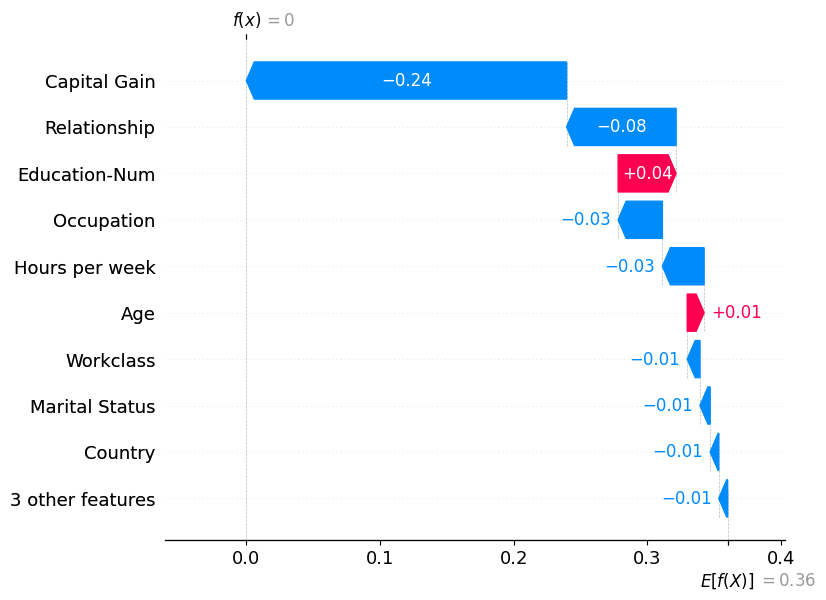

In [245]:
class_index = 1

sv = shap.Explanation(values = shap_values.values[0,:,class_index],
                      base_values = shap_values.base_values[0,class_index],
                      feature_names=X.columns)
shap.waterfall_plot(sv)

TODO: interpretation for this data point, but using automated text with strings + variables

But we could do so for the other class as well.
Let's pick a different class index

This plot is the same as before with the signs turned. Which makes sense since also the probability is turned.

## Understanding the data globally

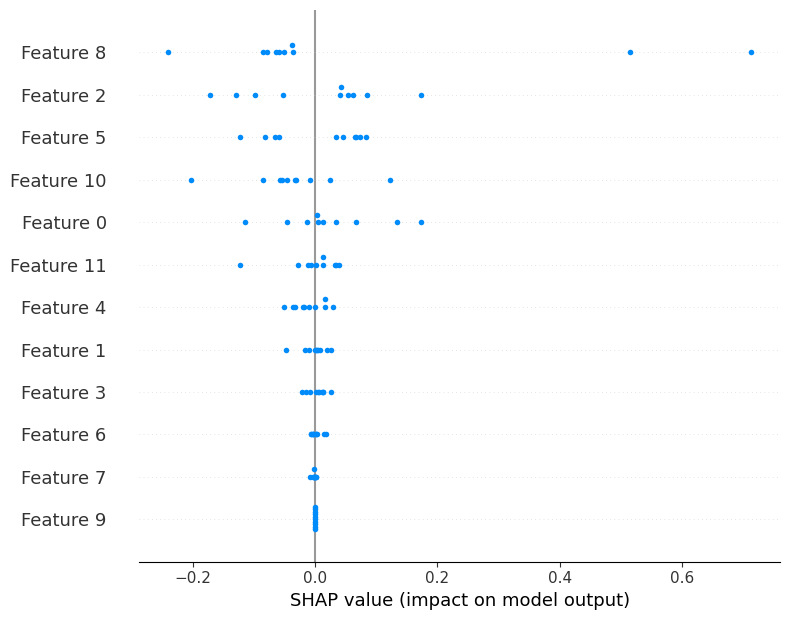

In [246]:
shap.summary_plot(shap_values.values[:,:,1])

This looks ugly as hell adn doesn't tell us anything. We have to provide more information to the plot to make sense:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


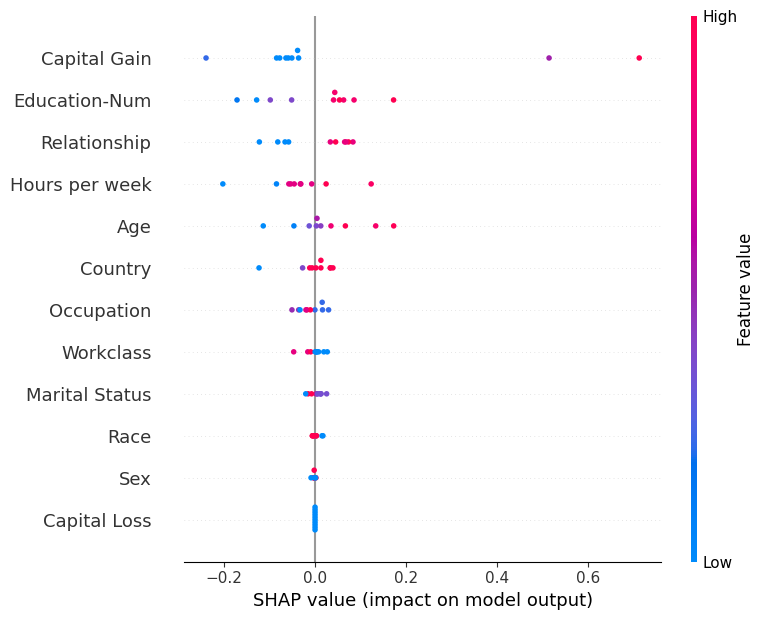

In [247]:
shap.summary_plot(shap_values.values[:,:,1], features = X.iloc[0:10,:])

Now we can actually see what's going on!

TODO: Interpretation of the plot

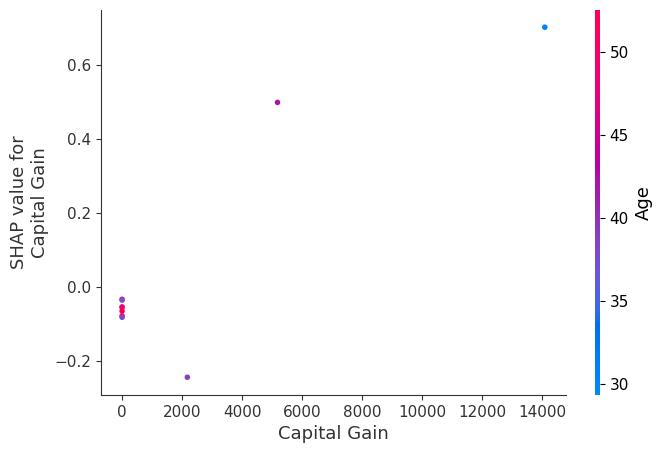

In [229]:
shap.dependence_plot("Capital Gain", shap_values.values[:,:,1], features = X.iloc[0:10,:])

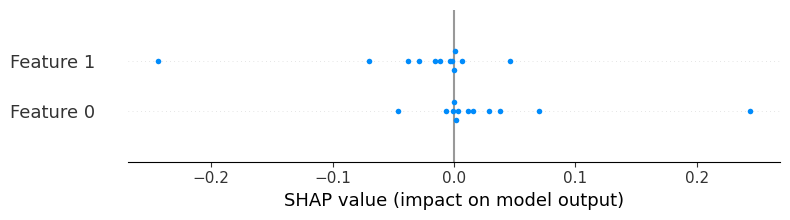

In [231]:
shap.summary_plot(shap_values.values[0])

In [221]:
?shap.summary_plot

## Multi-Class Classification